<a href="https://colab.research.google.com/github/DaliaEl-Sayed/DEPI---Generative-AI-Track-Tasks./blob/main/EDA_on_Salaries_Dataset_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading from Drive

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


#https://drive.google.com/file/d/1v54nqQoexM00y0X6CqkEwV_aHIPMq11r/view?usp=sharing
file_id = '1v54nqQoexM00y0X6CqkEwV_aHIPMq11r'
url = f'https://drive.google.com/uc?export=download&id={file_id}'


df = pd.read_csv(url)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [ ]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


#Data Preprocessing

In [ ]:
df.drop(['Notes', 'Status', 'EmployeeName', 'Agency'], axis=1, inplace=True)

In [ ]:
df[['job', 'department']] = df['JobTitle'].str.split('(', expand=True)
df.drop('JobTitle', axis=1, inplace=True)

# Replacing missing department values with 'Other'
df['department'] = df['department'].fillna('Other')

In [ ]:
# Encoding job titles and departments
label_encoder = LabelEncoder()
df['Job_encoded'] = label_encoder.fit_transform(df['job'])
df['Department_encoded'] = label_encoder.fit_transform(df['department'])

# Dropping original columns
df.drop(['job', 'department'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  148654 non-null  int64  
 1   BasePay             148045 non-null  float64
 2   OvertimePay         148650 non-null  float64
 3   OtherPay            148650 non-null  float64
 4   Benefits            112491 non-null  float64
 5   TotalPay            148654 non-null  float64
 6   TotalPayBenefits    148654 non-null  float64
 7   Year                148654 non-null  int64  
 8   Job_encoded         148654 non-null  int64  
 9   Department_encoded  148654 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 11.3 MB


In [ ]:
data = df.dropna(subset=['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits', 'Year', 'Job_encoded', 'Department_encoded', 'Benefits'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111886 entries, 36159 to 148653
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  111886 non-null  int64  
 1   BasePay             111886 non-null  float64
 2   OvertimePay         111886 non-null  float64
 3   OtherPay            111886 non-null  float64
 4   Benefits            111886 non-null  float64
 5   TotalPay            111886 non-null  float64
 6   TotalPayBenefits    111886 non-null  float64
 7   Year                111886 non-null  int64  
 8   Job_encoded         111886 non-null  int64  
 9   Department_encoded  111886 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 9.4 MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  148654 non-null  int64  
 1   BasePay             148045 non-null  float64
 2   OvertimePay         148650 non-null  float64
 3   OtherPay            148650 non-null  float64
 4   Benefits            112491 non-null  float64
 5   TotalPay            148654 non-null  float64
 6   TotalPayBenefits    148654 non-null  float64
 7   Year                148654 non-null  int64  
 8   Job_encoded         148654 non-null  int64  
 9   Department_encoded  148654 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 11.3 MB


In [ ]:
df.dropna(subset=['BasePay'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148045 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  148045 non-null  int64  
 1   BasePay             148045 non-null  float64
 2   OvertimePay         148045 non-null  float64
 3   OtherPay            148045 non-null  float64
 4   Benefits            111886 non-null  float64
 5   TotalPay            148045 non-null  float64
 6   TotalPayBenefits    148045 non-null  float64
 7   Year                148045 non-null  int64  
 8   Job_encoded         148045 non-null  int64  
 9   Department_encoded  148045 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 12.4 MB


train a model to predict the missing values

In [ ]:
# Split the DataFrame into features and target
X = data.drop('Benefits', axis=1)
y = data['Benefits']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 271.5483142108411


In [ ]:
from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(y_test, predictions)
print('R-squared Score:', r2)

R-squared Score: 0.9974423142028257


In [ ]:
# Use the trained model to predict the missing values in the 'Benefits' column
df['Benefits_predicted'] = model.predict(df[X.columns])

# Fill the missing values in the 'Benefits' column with the predicted values
df['Benefits'].fillna(df['Benefits_predicted'], inplace=True)

# Drop the 'Benefits_predicted' column
df.drop('Benefits_predicted', axis=1, inplace=True)

# Check for missing values
df.isnull().sum()


Id                    0
BasePay               0
OvertimePay           0
OtherPay              0
Benefits              0
TotalPay              0
TotalPayBenefits      0
Year                  0
Job_encoded           0
Department_encoded    0
dtype: int64

#Modeling

In [ ]:

from sklearn.preprocessing import StandardScaler
def r_squared(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

# Separate features and target
X = df.drop('TotalPay', axis=1)
y = df['TotalPay']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the ANN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r_squared])


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                160       
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 737 (2.88 KB)
Trainable params: 737 (2.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Training

In [ ]:

# Train the model
history = model.fit(X_train, y_train,validation_split=0.3, epochs=10, batch_size=128)


Epoch 1/10
648/648 [==============================] - 2s 2ms/step - loss: 8079123456.0000 - r_squared: -2.2327 - val_loss: 7822164480.0000 - val_r_squared: -2.1407
Epoch 2/10
648/648 [==============================] - 2s 3ms/step - loss: 6920218624.0000 - r_squared: -1.7746 - val_loss: 5739288576.0000 - val_r_squared: -1.3091
Epoch 3/10
648/648 [==============================] - 3s 4ms/step - loss: 4238268160.0000 - r_squared: -0.7023 - val_loss: 2848139776.0000 - val_r_squared: -0.1518
Epoch 4/10
648/648 [==============================] - 2s 2ms/step - loss: 1916187392.0000 - r_squared: 0.2259 - val_loss: 1285187328.0000 - val_r_squared: 0.4792
Epoch 5/10
648/648 [==============================] - 1s 2ms/step - loss: 958649472.0000 - r_squared: 0.6129 - val_loss: 732073792.0000 - val_r_squared: 0.7043
Epoch 6/10
648/648 [==============================] - 1s 2ms/step - loss: 565065728.0000 - r_squared: 0.7727 - val_loss: 432973440.0000 - val_r_squared: 0.8254
Epoch 7/10
648/648 [======

#Evaluation

In [ ]:
r2_score = history.history['r_squared'][-1]
print('R-squared Score:', r2_score)

R-squared Score: 0.9301348328590393


926/926 [==============================] - 1s 1ms/step - loss: 164505808.0000 - r_squared: 0.9301
Test loss: [164505808.0, 0.9300682544708252]
926/926 [==============================] - 1s 1ms/step


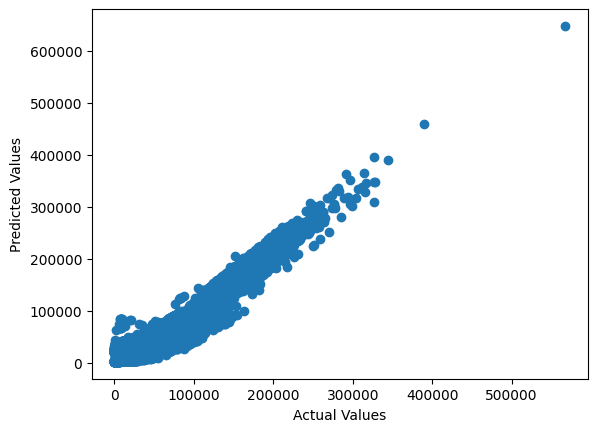

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

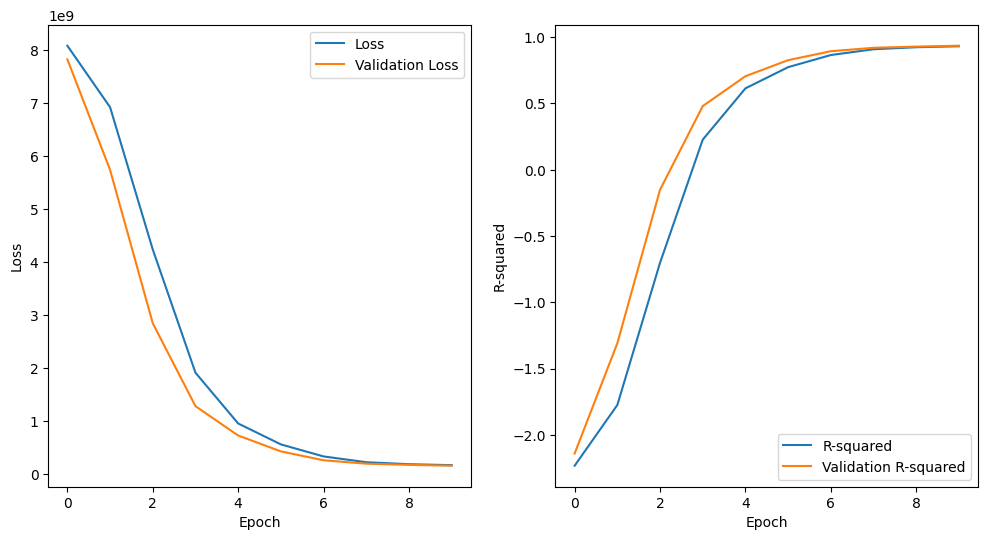

In [ ]:
#Plot the loss and accuracy curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['r_squared'], label='R-squared')
plt.plot(history.history['val_r_squared'], label='Validation R-squared')
plt.xlabel('Epoch')
plt.ylabel('R-squared')
plt.legend()

plt.show()